In [1]:
%load_ext pyinstrument

In [2]:
import sys
sys.path.append('/mnt/d/packing/code/core/')
import kaggle_support as kgs
import importlib
import matplotlib.pyplot as plt
importlib.reload(kgs)

local
local


<module 'kaggle_support' from '/mnt/d/packing/code/core/kaggle_support.py'>

_     ._   __/__   _ _  _  _ _/_   Recorded: 20:13:51  Samples:  972
 /_//_/// /_\ / //_// / //_'/ //     Duration: 1.117     CPU time: 1.081
/   _/                      v5.1.1

Line in cell [4]

1.117 <cell line: 0>  /tmp/ipykernel_125286/2644992743.py:1
`- 1.117 PackingCost.compute_total_cost_ref  pack_cost.py:86
   `- 1.117 CollisionCostOverlappingArea.compute_cost_ref  pack_cost.py:17
      |- 1.008 CollisionCostOverlappingArea._compute_cost_one_tree_ref  pack_cost.py:57
      |  |- 0.552 wrapper  shapely/decorators.py:171
      |  |     [3 frames hidden]  shapely
      |  |        0.544 intersection  shapely/set_operations.py:112
      |  |- 0.115 [self]  pack_cost.py
      |  |- 0.114 ndarray.get  <built-in>
      |  |- 0.095 create_tree  kaggle_support.py:252
      |  |  |- 0.055 rotate  shapely/affinity.py:126
      |  |  |     [7 frames hidden]  shapely
      |  |  |- 0.017 translate  shapely/affinity.py:247
      |  |  |     [2 frames hidden]  shapely
      |  |  `- 0.014 check_argument_types  typeguard/_functions.py:118
      |  |     `- 0.012 check_type_internal  typeguard/_checkers.py:898
      |  |- 0.057 array  cupy/_creation/from_data.py:7
      |  |  `- 0.055 array  <built-in>
      |  |- 0.031 ndarray.copy  <built-in>
      |  `- 0.019 wrapped  shapely/decorators.py:73
      |- 0.083 delete  cupy/_manipulation/add_remove.py:8
      |     [16 frames hidden]  cupy, <built-in>, importlib
      `- 0.012 TreeList.get_trees  kaggle_support.py:301
         `- 0.012 create_tree  kaggle_support.py:252
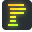

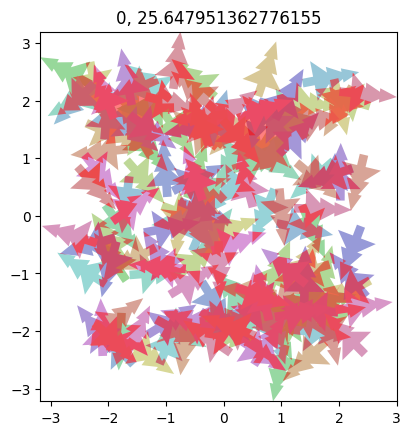

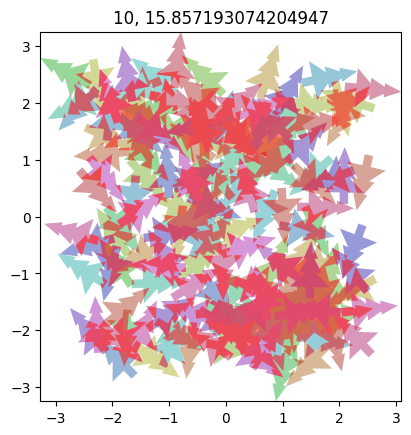

In [4]:
import pack_basics
import pack_vis
importlib.reload(pack_basics)
importlib.reload(pack_vis)
tree_list = pack_basics.place_random(150, 5)
#tree_list.xyt = [[0.,0.,0.],[0.,1.,np.pi]]
#pack_vis.visualize_tree_list(tree_list)

import pack_cost
import numpy as np
import cupy as cp
from matplotlib import animation
from IPython.display import HTML
cost = pack_cost.PackingCost()
cost.collision_cost = pack_cost.CollisionCostOverlappingArea()

N_steps = 20
dt = 0.02
xyt_list = cp.zeros((N_steps, tree_list.N, 3))
xyt = cp.array(tree_list.xyt)
%pyinstrument total_cost, total_grad = cost.compute_total_cost_ref(cp.array(tree_list.xyt), include_gradients=True)
for i_step in range(N_steps):
    xyt_list[i_step] = xyt
    total_cost, total_grad = cost.compute_total_cost_ref(xyt, include_gradients=True)
    xyt -= dt * total_grad
    if (i_step)%10==0:
        tree_list.xyt=xyt
        pack_vis.visualize_tree_list(tree_list)
        plt.title(f'{i_step}, {total_cost}')
        plt.pause(0.001)


#pack_vis.visualize_tree_list(tree_list)



In [ ]:
# import matplotlib.pyplot as plt
# importlib.reload(pack_vis)

# fig, ax = plt.subplots(figsize=(10, 10))

# def animate(i):
#     ax.clear()
#     tree_list.xyt = xyt_list[i]
#     pack_vis.visualize_tree_list(tree_list, ax=ax)
#     ax.set_title(f'Step {i}/{N_steps-1}')

# anim = animation.FuncAnimation(fig, animate, frames=N_steps, interval=50)
# plt.close()
# HTML(anim.to_jshtml())

In [ ]:
150/(9^2)

13.636363636363637

In [ ]:
9^2/150

TypeError: unsupported operand type(s) for ^: 'int' and 'float'

In [ ]:
9**2/150

0.54